# Oluwafemi Shobowale 
## HW4

In [1]:
import numpy as np
import pandas as pd
import pylab as pl
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#load data 
image= pd.read_csv('segmentation_data.txt', header= None)

image_class= pd.read_table('segmentation_classes.txt', header= None)

image_name= pd.read_table('segmentation_names.txt', header= None)

In [3]:
image.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,110.0,189.0,9,0.0,0.0,1.000000,0.666667,1.222222,1.186342,12.925926,10.888889,9.222222,18.666668,-6.111111,-11.111111,17.222221,18.666668,0.508139,1.910864
1,86.0,187.0,9,0.0,0.0,1.111111,0.720082,1.444444,0.750309,13.740741,11.666667,10.333334,19.222221,-6.222222,-10.222222,16.444445,19.222221,0.463329,1.941465
2,225.0,244.0,9,0.0,0.0,3.388889,2.195113,3.000000,1.520234,12.259259,10.333334,9.333334,17.111110,-5.777778,-8.777778,14.555555,17.111110,0.480149,1.987902
3,47.0,232.0,9,0.0,0.0,1.277778,1.254621,1.000000,0.894427,12.703704,11.000000,9.000000,18.111110,-5.111111,-11.111111,16.222221,18.111110,0.500966,1.875362
4,97.0,186.0,9,0.0,0.0,1.166667,0.691215,1.166667,1.005540,15.592592,13.888889,11.777778,21.111110,-5.111111,-11.444445,16.555555,21.111110,0.442661,1.863654


In [4]:
from sklearn import preprocessing
image_copy= image.copy()


In [5]:
scaler=preprocessing.MinMaxScaler()
image_copy=scaler.fit_transform(image_copy)

### 1b K-means

In [6]:
from sklearn.cluster import KMeans 
image_kmeans = KMeans(n_clusters=7, max_iter=500, verbose=1).fit(image_copy)

Initialization complete
Iteration 0, inertia 699.5269595424501
Iteration 1, inertia 378.21091176867026
Iteration 2, inertia 368.8143298952943
Iteration 3, inertia 366.1349066622081
Iteration 4, inertia 364.32248040051996
Iteration 5, inertia 363.90014429072966
Iteration 6, inertia 363.6897674840175
Iteration 7, inertia 363.55475663680977
Iteration 8, inertia 363.4516643059188
Iteration 9, inertia 363.41162304521714
Iteration 10, inertia 363.39824331060623
Iteration 11, inertia 363.3966490789776
Converged at iteration 11: strict convergence.
Initialization complete
Iteration 0, inertia 531.7175765199975
Iteration 1, inertia 397.6788512931182
Iteration 2, inertia 382.10879789351475
Iteration 3, inertia 380.26464107214474
Iteration 4, inertia 378.65639894988567
Iteration 5, inertia 377.5246560288681
Iteration 6, inertia 376.2478999834529
Iteration 7, inertia 375.0623392497739
Iteration 8, inertia 374.25676670190006
Iteration 9, inertia 373.89752093794954
Iteration 10, inertia 373.69980911

In [7]:
image_cluster = image_kmeans.predict(image_copy)

In [8]:
image_clusters= pd.DataFrame(image_cluster, columns=["image_cluster"])
image_clusters.head()

,image_cluster
0,0
1,0
2,0
3,0
4,0


#### Image_kmeans_centroids

In [9]:
pd.options.display.float_format='{:,.2f}'.format

image_kmeans_centroids = pd.DataFrame(image_kmeans.cluster_centers_ , columns=image.columns)
image_kmeans_centroids

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.51,0.81,0.00,0.08,0.01,0.05,0.00,0.05,0.00,0.11,0.09,0.09,0.14,0.68,0.08,0.82,0.13,0.41,0.89
1,0.54,0.15,0.00,0.03,0.00,0.03,0.00,0.03,0.00,0.82,0.78,0.89,0.79,0.27,0.67,0.29,0.89,0.21,0.13
2,0.25,0.46,0.00,0.03,0.01,0.04,0.00,0.03,0.00,0.03,0.02,0.04,0.02,0.77,0.22,0.51,0.04,0.80,0.18
3,0.77,0.43,0.00,0.01,0.02,0.04,0.00,0.02,0.00,0.04,0.04,0.06,0.03,0.78,0.22,0.49,0.06,0.54,0.24
4,0.75,0.53,0.00,0.04,0.04,0.11,0.02,0.11,0.02,0.30,0.28,0.35,0.27,0.59,0.45,0.31,0.35,0.30,0.16
5,0.26,0.39,0.00,0.07,0.02,0.08,0.00,0.06,0.00,0.15,0.14,0.19,0.12,0.72,0.34,0.36,0.19,0.41,0.20
6,0.30,0.53,0.00,0.05,0.05,0.10,0.01,0.08,0.01,0.40,0.37,0.47,0.35,0.50,0.57,0.21,0.47,0.30,0.16


In [10]:
cluster_view= image_kmeans_centroids
cluster_view_ = np.array(cluster_view)

## Matric

In [11]:
from sklearn import metrics

In [12]:
silhouettes = metrics.silhouette_samples(image_copy, image_cluster)
print(silhouettes[:20])

[0.57202831 0.56064636 0.46584172 0.49522097 0.57151852 0.56037254
 0.54213796 0.41254281 0.51968142 0.46733032 0.48661677 0.49108474
 0.58463969 0.56222519 0.37949564 0.53083575 0.54919193 0.42227935
 0.41618572 0.40389039]


In [13]:
print(silhouettes.mean())

0.332066475286672


In [14]:
def plot_silhouettes(data, clusters, metric='euclidean'):
    
    from matplotlib import cm
    from sklearn.metrics import silhouette_samples

    cluster_labels = np.unique(clusters)
    n_clusters = cluster_labels.shape[0]
    silhouette_vals = metrics.silhouette_samples(data, clusters, metric='euclidean')
    c_ax_lower, c_ax_upper = 0, 0
    cticks = []
    for i, k in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[clusters == k]
        c_silhouette_vals.sort()
        c_ax_upper += len(c_silhouette_vals)
        color = cm.jet(float(i) / n_clusters)
        pl.barh(range(c_ax_lower, c_ax_upper), c_silhouette_vals, height=1.0, 
                      edgecolor='none', color=color)

        cticks.append((c_ax_lower + c_ax_upper) / 2)
        c_ax_lower += len(c_silhouette_vals)
    
    silhouette_avg = np.mean(silhouette_vals)
    pl.axvline(silhouette_avg, color="red", linestyle="--") 

    pl.yticks(cticks, cluster_labels)
    pl.ylabel('Cluster')
    pl.xlabel('Silhouette coefficient')

    pl.tight_layout()
    #pl.savefig('images/11_04.png', dpi=300)
    pl.show()
    
    return

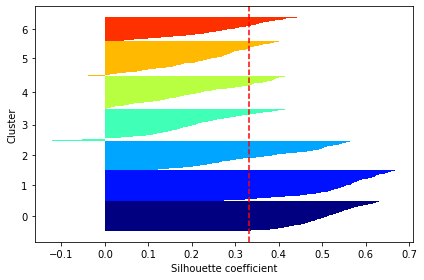

In [15]:
plot_silhouettes(image_copy, image_cluster)

In [16]:
metrics.homogeneity_score(image_class[1], image_clusters['image_cluster'])

0.6115021163370863

In [17]:
metrics.completeness_score(image_class[1], image_clusters['image_cluster'])

0.6131870124853012

In [18]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
###Finding the ideal value of K. 
Sum_of_squared_distances = []
predircted_lables= []

for k in range(2,20,1):
    km = KMeans(n_clusters=k,
               init='k-means++',n_init=14,max_iter=500,random_state=0)
    km = km.fit(image_copy)
    Sum_of_squared_distances.append(km.inertia_)
    predircted_lables.append(km.labels_)

Text(0.5, 1.0, 'Elbow Method For Optimal k')

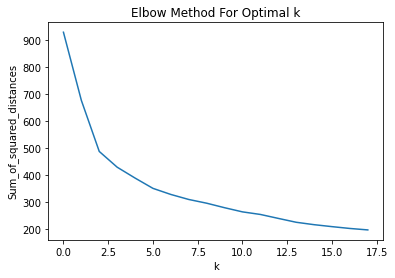

In [19]:
sns.lineplot(data=Sum_of_squared_distances)
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')

In [20]:
#Overall mean 
from statistics import mean
#mean(mean_s)
predircted_lables[0]

array([1, 1, 1, ..., 1, 1, 1])

In [21]:
mean_s=[]
for i in range(len(predircted_lables)):
    mean_silhouettes = (metrics.silhouette_samples(image_copy, predircted_lables[i])).mean()
    mean_s.append(mean_silhouettes)
    

Text(0.5, 1.0, 'k')

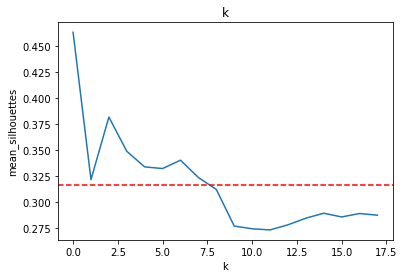

In [22]:
sns.lineplot(data=mean_s)
plt.axhline(y = 0.3163299182249685, color = 'r', linestyle = '--')
plt.xlabel('k')
plt.ylabel('mean_silhouettes')
plt.title('k')

### The K-values above the mean line would give an above average silhouettes score. K=4 should yeild a better result. It also pass the elbow test. 

### 1D, PCA 

In [23]:

from sklearn.decomposition import PCA
pca = PCA()
DTtrans = pca.fit(image_copy).transform(image_copy)

In [24]:
np.set_printoptions(precision=2,suppress=True, edgeitems=5, linewidth=120)

In [25]:
print(pca.explained_variance_ratio_)

[0.61 0.13 0.1  0.05 0.04 0.02 0.02 0.02 0.01 0.01 0.   0.   0.   0.   0.   0.   0.   0.   0.  ]


In [26]:
varPercentage = pca.explained_variance_ratio_*100

In [27]:
varPercentage

array([60.71, 13.2 , 10.12,  4.54,  3.55,  1.99,  1.89,  1.62,  1.07,  0.71,  0.39,  0.16,  0.05,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ])

In [28]:
new_list=[]
j=0
for i in range(0,len(varPercentage)):
    j+=varPercentage[i]
    new_list.append(j)
     
print(new_list)

[60.71423396853328, 73.91121320168928, 84.03498614256192, 88.57852534332585, 92.12588648109569, 94.11392197960623, 96.00589227704958, 97.62130108194518, 98.68690193362033, 99.39823945149534, 99.79044297671412, 99.9479432861607, 99.99685835864896, 99.99999999999994, 99.99999999999997, 99.99999999999999, 100.0, 100.00000000000001, 100.00000000000001]


## PC= 7 would give about 95% variance in the data. 

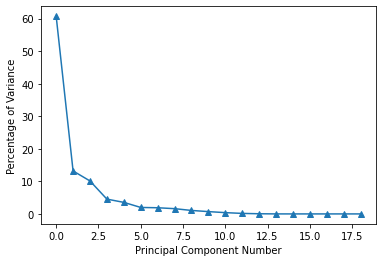

In [29]:
import matplotlib
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(range(len(varPercentage)), varPercentage[:], marker='^')
plt.xlabel('Principal Component Number')
plt.ylabel('Percentage of Variance')
plt.show()

## Reduce Data 

In [30]:
# Alternatively, we can perform PCA decompoisition again with a specified number of PCs

pca = PCA(n_components=7)
image_reduced = pca.fit(image_copy).transform(image_copy)

In [31]:
print(image_reduced)

[[-0.69  0.53  0.25 -0.2  -0.08  0.05 -0.05]
 [-0.67  0.51  0.34 -0.17 -0.04  0.06 -0.04]
 [-0.71  0.77 -0.16 -0.01 -0.17  0.04 -0.06]
 [-0.73  0.51  0.5  -0.06 -0.14  0.03 -0.1 ]
 [-0.64  0.53  0.3  -0.18 -0.02  0.05 -0.06]
 ...
 [-0.5  -0.26  0.27  0.11 -0.01 -0.01 -0.1 ]
 [-0.5  -0.26  0.38  0.15  0.03 -0.2   0.14]
 [-0.51 -0.13 -0.08  0.1  -0.03 -0.03 -0.11]
 [-0.48 -0.09 -0.16  0.11  0.   -0.   -0.09]
 [-0.44 -0.11 -0.05  0.15  0.02 -0.21  0.15]]


In [32]:
print(DTtrans[:,:7])

[[-0.69  0.53  0.25 -0.2  -0.08  0.05 -0.05]
 [-0.67  0.51  0.34 -0.17 -0.04  0.06 -0.04]
 [-0.71  0.77 -0.16 -0.01 -0.17  0.04 -0.06]
 [-0.73  0.51  0.5  -0.06 -0.14  0.03 -0.1 ]
 [-0.64  0.53  0.3  -0.18 -0.02  0.05 -0.06]
 ...
 [-0.5  -0.26  0.27  0.11 -0.01 -0.01 -0.1 ]
 [-0.5  -0.26  0.38  0.15  0.03 -0.2   0.14]
 [-0.51 -0.13 -0.08  0.1  -0.03 -0.03 -0.11]
 [-0.48 -0.09 -0.16  0.11  0.   -0.   -0.09]
 [-0.44 -0.11 -0.05  0.15  0.02 -0.21  0.15]]


### 1e, Perform Kmeans on reduce dimesnsion 

In [33]:
from sklearn.cluster import KMeans 
pca_image_kmeans = KMeans(n_clusters=7, max_iter=500, verbose=1).fit(image_reduced)

Initialization complete
Iteration 0, inertia 504.1711144782954
Iteration 1, inertia 322.782710341589
Iteration 2, inertia 311.9047528377706
Iteration 3, inertia 306.818837720451
Iteration 4, inertia 306.06040413000403
Iteration 5, inertia 305.80164160599696
Iteration 6, inertia 305.66304767065753
Iteration 7, inertia 305.6207232945564
Iteration 8, inertia 305.61082747653825
Converged at iteration 8: center shift 6.591583870813456e-06 within tolerance 1.0814787009154225e-05.
Initialization complete
Iteration 0, inertia 469.4292922167012
Iteration 1, inertia 343.5448660693691
Iteration 2, inertia 339.92039351025835
Iteration 3, inertia 335.69509835781025
Iteration 4, inertia 328.8280550084623
Iteration 5, inertia 319.32715828654824
Iteration 6, inertia 312.99327134525277
Iteration 7, inertia 309.05132610533644
Iteration 8, inertia 307.06348725203515
Iteration 9, inertia 306.3247285724466
Iteration 10, inertia 305.8985647958659
Iteration 11, inertia 305.717549133883
Iteration 12, inertia 

In [34]:
image_cluster_PCA = pca_image_kmeans.predict(image_reduced)

In [35]:
pca_silhouettes = metrics.silhouette_samples(image_reduced, image_cluster_PCA)
print(pca_silhouettes)

[ 0.59  0.57  0.48  0.51  0.59 ...  0.12  0.02 -0.03  0.17  0.08]


In [36]:
pca_silhouettes.mean()

0.3597095797980182

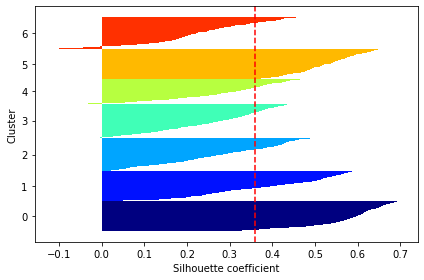

In [37]:
plot_silhouettes(image_reduced, image_cluster_PCA)

In [38]:
metrics.homogeneity_score(image_class[1], image_cluster_PCA)

0.6099736092174177

In [39]:
metrics.completeness_score(image_class[1], image_cluster_PCA)

0.6115749269916773

### The average silhouettes score increased by 4% the homogeneity of the model and completness also increased. 

In [40]:
from numpy import *
from numpy import linalg as la

### 2

In [41]:
jokes = pd.read_csv("jokes.csv", usecols=[1], header= None )
joke_1 = pd.read_csv("modified_jester_data.csv", header= None )

In [42]:
jokes.head()

,1
0,"A man visits the doctor. The doctor says ""I ha..."
1,This couple had an excellent relationship goin...
2,Q. What's 200 feet long and has 4 teeth? A. Th...
3,Q. What's the difference between a man and a t...
4,Q. What's O. J. Simpson's Internet address? A....


In [43]:
joke_1.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,3.18,19.79,1.34,2.84,3.48,2.50,1.15,15.17,2.02,6.24,...,13.82,0.00,0.00,0.00,0.00,0.00,5.37,0.00,0.00,0.00
1,15.08,10.71,17.36,15.37,8.62,1.34,10.27,5.66,19.88,20.22,...,13.82,6.05,10.71,18.86,10.81,8.86,14.06,11.34,6.68,12.07
2,0.00,0.00,0.00,0.00,20.03,20.27,20.03,20.27,0.00,0.00,...,0.00,0.00,0.00,20.08,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,19.35,0.00,0.00,12.80,19.16,8.18,17.21,0.00,12.84,...,0.00,0.00,0.00,11.53,0.00,0.00,0.00,0.00,0.00,0.00
4,19.50,15.61,6.83,5.61,12.36,12.60,18.04,15.61,10.56,16.73,...,16.19,16.58,15.27,16.19,16.73,12.55,14.11,17.55,12.80,12.60


In [44]:
def get_joke_text(jokes, id):
    return np.array(jokes)[id]

In [45]:
print(get_joke_text(jokes, 99))

["Q: What's the difference between greeting a Queen and greeting thePresident of the United  States?A: You only have to get on one knee to greet the queen."]


In [46]:
from numpy import *
from numpy import linalg as la
import numpy as np

def euclidSim(inA,inB):
    return 1.0 / (1.0 + la.norm(inA - inB))

def pearsonSim(inA,inB):
    if len(inA) < 3 : return 1.0
    return 0.5 + 0.5 * corrcoef(inA, inB, rowvar = 0)[0][1]

def cosineSim(inA,inB):
    num = float(inA.T * inB)
    denom = la.norm(inA)*la.norm(inB)
    return 0.5 + 0.5 * (num / denom)

In [47]:
def standEst(dataMat, user, simMeas, item):
    n = shape(dataMat)[1]
    simTotal = 0.0; ratSimTotal = 0.0
    for j in range(n):
        userRating = dataMat[user,j]
        if userRating == 0: 
            continue
        overLap = nonzero(logical_and(dataMat[:,item]>0, dataMat[:,j]>0))[0]
        if len(overLap) == 0: 
            similarity = 0
        else: 
            similarity = simMeas(dataMat[overLap,item], dataMat[overLap,j])
        #print('the %d and %d similarity is: %f' % (item, j, similarity))
        simTotal += similarity
        ratSimTotal += similarity * userRating
    if simTotal == 0: return 0
    else: return ratSimTotal/simTotal

In [48]:
def svdEst(dataMat, user, simMeas, item):
    n = shape(dataMat)[1]
    k = 4 #number of dimension for SVD
    simTotal = 0.0; ratSimTotal = 0.0
    data=mat(dataMat)
    U,Sigma,VT = la.svd(data)
    Sig_k = mat(eye(k)*Sigma[:k]) #arrange Sig_k into a diagonal matrix
    xformedItems = data.T * U[:,:k] * Sig_k.I  #create transformed items
    for j in range(n):
        userRating = data[user,j]
        if userRating == 0 or j==item: continue
        similarity = simMeas(xformedItems[item,:].T, xformedItems[j,:].T)
        #print('the %d and %d similarity is: %f' % (item, j, similarity))
        simTotal += similarity
        ratSimTotal += similarity * userRating
    if simTotal == 0: return 0
    else: return ratSimTotal/simTotal

In [49]:
def recommend(dataMat, user, N, simMeas=pearsonSim, estMethod=standEst):
    unratedItems = nonzero(dataMat[user,:].A==0)[1] #find unrated items 
    if len(unratedItems) == 0: return 'you rated everything'
    itemScores = []
    for item in unratedItems:
        estimatedScore = estMethod(dataMat, user, simMeas, item)
        itemScores.append((item, estimatedScore))
    return sorted(itemScores, key=lambda jj: jj[1], reverse=True)[:N]

In [50]:
def loadData():
    M = joke_1
    return(np.mat(M))

In [51]:
data = loadData()
print(data)


[[ 3.18 19.79  1.34  2.84  3.48 ...  0.    5.37  0.    0.    0.  ]
 [15.08 10.71 17.36 15.37  8.62 ...  8.86 14.06 11.34  6.68 12.07]
 [ 0.    0.    0.    0.   20.03 ...  0.    0.    0.    0.    0.  ]
 [ 0.   19.35  0.    0.   12.8  ...  0.    0.    0.    0.    0.  ]
 [19.5  15.61  6.83  5.61 12.36 ... 12.55 14.11 17.55 12.8  12.6 ]
 ...
 [12.94  5.47 16.19  5.51  6.92 ...  6.87 13.23  5.47 14.54 13.38]
 [15.27 11.39 16.39  5.37  7.41 ...  0.    0.    0.    0.    0.  ]
 [16.58 16.63 15.85  7.89 14.4  ...  0.    0.    0.    0.    0.  ]
 [ 3.67  4.45  3.67  3.67  9.4  ...  3.77  3.77  3.77  3.77  3.28]
 [ 9.88 11.73  9.16  9.5  13.52 ...  0.    0.    0.    0.    0.  ]]


### 2a, 

In [52]:
user = 4
recommendations = recommend(data, user, 5, simMeas=cosineSim, estMethod=standEst)

In [53]:
print("Recommended Items for User", user,"with COSINE sim", ":\n")
for i, p in recommendations:
    print(get_joke_text(jokes, i), "\n")
    print("Item ", i, "with predicted rating: ", p, "\n")

Recommended Items for User 4 with COSINE sim :

['On the first day of college the Dean addressed the students pointing out some of the rules:"The female dormitory will be out-of-bounds for all male students and the male dormitory to the female students. Anybody caught breaking this rule will be fined $20 the first time." He continued "Anybody caught breaking this rule the second time will be fined $60. Being caught a third time will cost you a fine of $180. Are there any questions ?"At this point a male student in the crowd inquired:"How much for a season pass ?"'] 

Item  71 with predicted rating:  14.293754381681563 

["There once was a man and a woman that both  got in  a terrible car wreck. Both of their vehicles  were completely destroyed buy fortunately no one  was   hurt.  In thankfulness the woman said to the man 'We are both okay so we should celebrate. I have   a  bottle of wine in my car let's open it.' So the woman got the bottle out of the car and  handed it to the man. Th

In [54]:
recommendations_person= recommend(data, user, 5, pearsonSim, standEst)

In [55]:
print("Recommended Items for User", user,"with COSINE sim", ":\n")
for i, p in recommendations_person:
    print(get_joke_text(jokes, i), "\n")
    print("Item ", i, "with predicted rating: ", p, "\n")

Recommended Items for User 4 with COSINE sim :

['On the first day of college the Dean addressed the students pointing out some of the rules:"The female dormitory will be out-of-bounds for all male students and the male dormitory to the female students. Anybody caught breaking this rule will be fined $20 the first time." He continued "Anybody caught breaking this rule the second time will be fined $60. Being caught a third time will cost you a fine of $180. Are there any questions ?"At this point a male student in the crowd inquired:"How much for a season pass ?"'] 

Item  71 with predicted rating:  14.413443009309447 

["There once was a man and a woman that both  got in  a terrible car wreck. Both of their vehicles  were completely destroyed buy fortunately no one  was   hurt.  In thankfulness the woman said to the man 'We are both okay so we should celebrate. I have   a  bottle of wine in my car let's open it.' So the woman got the bottle out of the car and  handed it to the man. Th

In [56]:
user = 25
recommendations = recommend(data, user, 5, simMeas=pearsonSim, estMethod=standEst)

In [57]:
print("Recommended Items for User", user,"with standEst", ":\n")
for i, p in recommendations:
    print("Item ", i, "with predicted rating: ", p, "\n")
    print(get_joke_text(jokes, i), "\n")

Recommended Items for User 25 with standEst :

Item  99 with predicted rating:  15.324673571007686 

["Q: What's the difference between greeting a Queen and greeting thePresident of the United  States?A: You only have to get on one knee to greet the queen."] 

Item  71 with predicted rating:  15.324296950553675 

['On the first day of college the Dean addressed the students pointing out some of the rules:"The female dormitory will be out-of-bounds for all male students and the male dormitory to the female students. Anybody caught breaking this rule will be fined $20 the first time." He continued "Anybody caught breaking this rule the second time will be fined $60. Being caught a third time will cost you a fine of $180. Are there any questions ?"At this point a male student in the crowd inquired:"How much for a season pass ?"'] 

Item  97 with predicted rating:  15.322105340570541 

["Age and Womanhood1. Between the ages of 13 and 18 ... She is like Africa virgin and unexplored. 2. Betw

In [58]:
user = 25
recommendations = recommend(data, user, 5, simMeas=pearsonSim, estMethod=svdEst)

In [59]:
print("Recommended Items for User", user,"with svdEst", ":\n")
for i, p in recommendations:
    print(get_joke_text(jokes, i), "\n")
    print("Item ", i, "with predicted rating: ", p, "\n")

Recommended Items for User 25 with svdEst :

["Q. What's the difference between a man and a toilet? A. A toilet doesn't follow you around after you use it."] 

Item  3 with predicted rating:  15.277088154749473 

['Hillary Bill Clinton and the Pope are sitting together on an airplane. Bill says "I could throw one thousand dollar bill out of this plane and make one person very happy."Hillary says "I could throw 10 hundred dollar bills out of the plane and make 10 people very happy."The Pope chips in and says "I could throw Bill out of the airplane and make the whole country happy."'] 

Item  79 with predicted rating:  15.238062599769169 

["Q: What is the difference between George  Washington Richard Nixon and Bill Clinton? A: Washington couldn't tell a lie Nixon couldn't   tell the truth andClinton doesn't know the difference."] 

Item  72 with predicted rating:  15.209188661833458 

['On the first day of college the Dean addressed the students pointing out some of the rules:"The femal

### 2b,

In [60]:
def cross_validate_user(dataMat, user, test_ratio, estMethod, simMeas):
    dataMat = np.array(dataMat)
    number_of_items = np.shape(dataMat)[1]
    rated_items_by_user = np.array([i for i in range(number_of_items) if dataMat[user,i]>0])
    test_size = int(test_ratio * len(rated_items_by_user))
    test_indices = np.random.randint(0, len(rated_items_by_user), test_size)
    withheld_items = rated_items_by_user[test_indices]
    original_user_profile = np.copy(dataMat[user])
    dataMat[user, withheld_items] = 0 # So that the withheld test items is not used in the rating estimation below
    error_u = 0.0
    count_u = len(withheld_items)

    # Compute absolute error for user u over all test items
    for item in withheld_items:
        # Estimate rating on the withheld item
        estimatedScore = estMethod(dataMat, user, simMeas, item)
        error_u = error_u + abs(estimatedScore - original_user_profile[item])
    
    # Now restore ratings of the withheld items to the user profile
    for item in withheld_items:
        dataMat[user, item] = original_user_profile[item]

    # Return sum of absolute errors and the count of test cases for this user
    # Note that these will have to be accumulated for each user to compute MAE
    return error_u, count_u

In [61]:
def test(dataMat, test_ratio, estMethod, simMeas):
    MAE=0
    error_= []
    cou_nt_= 0
    for i in range(len(dataMat)):
        error__, cou_nt =cross_validate_user(dataMat, i,test_ratio , estMethod, simMeas)
        error_.append(error__)
        MAE= sum(error_)/len(dataMat)
       
        #print(MAE)
        #MAE += (error/cou_nt)  
        
        
    # Write this function to iterate over all users and for each perform evaluation by calling
    # the above cross_validate_user function on each user. MAE will be the ratio of total error 
    # across all test cases to the total number of test cases, across all users
    return MAE

In [62]:
user=78
test_ratio =0.2

In [63]:
%%time 
MEA= test(data, test_ratio , standEst, pearsonSim )
print ("MEA :", MEA )

MEA : 51.58767747300187
Wall time: 2min 20s


In [64]:
%%time 
MEA= test(data, test_ratio , svdEst, pearsonSim )
print ("MEA :", MEA )

MEA : 50.537232189315006
Wall time: 6min 55s


In [95]:
%%time 
MEA= test(data, test_ratio , svdEst, pearsonSim )
print ("MEA :", MEA )

MEA : 50.111475167799746
Wall time: 6min 38s


In [66]:
%%time 
MEA= test(data, test_ratio , svdEst, cosineSim )
print ("MEA :", MEA )

MEA : 50.63449781192925
Wall time: 5min 7s


### 2c, 

In [81]:
def print_most_similar_jokes(dataMat, jokes, queryJoke, k, metric=pearsonSim):
    # Write this function to find the k most similar jokes (based on user ratings) to a queryJoke
    print("Joke",queryJoke, "is similar to", ":\n")
    d=[]
    
    # The queryJoke is a joke id as given in the 'jokes.csv' file (an corresponding to the a column in dataMat)
    # You must compare ratings for the queryJoke (the column in dataMat corresponding to the joke), to all
    for rated_joke in range((dataMat.shape[1])):
            sim = np.array((metric(dataMat[:,queryJoke],dataMat[:,rated_joke])))
            #print(sim)
            d.append(sim)
            d_arr= np.array(d)
            idx= np.argsort(d_arr)
            reverse_array = idx[::-1]
            knn_jokes= np.delete(reverse_array[:k+1],0)
            knn_sim = d_arr[knn_jokes[:k+1]]
            
    print(get_joke_text(jokes, knn_jokes),":\n")
    return knn_jokes ,knn_sim
        
    #idx= np.argsort(sim)
    # other joke rating vectors and return the top k. Note that this is the same as performing KNN on the 
    # columns of dataMat. The function must retrieve the text of the joke from 'jokes.csv' file and print both
    # the queryJoke text as well as the text of the returned top-k jokes.

In [82]:
queryJoke=9
print_most_similar_jokes(data,jokes, queryJoke, 3, metric=pearsonSim)

Joke 9 is similar to :

[['A duck walks into a pharmacy and asks for a condom. The pharmacist says"Would you like me to stick that on your bill?"The duck says: "What kind of duck do you think I am!"']
 ["Q. What do a hurricane a tornado and a redneck divorce all have in common? A. Someone's going to lose their trailer..."]
 ['A woman has twins and gives them up for adoption.  One of them goes to a family in Egypt and is named "Amal."  The other goes to a  family in Spain; they name him "Juan."  Years later Juan sends a picture of himself to his mom.  Upon receiving the picture she tells her husband that she wishes she also had a picture of Amal.  Her husband responds "But they are twins-if you\'ve seen Juan you\'ve seen   Amal.']] :



(array([21, 10, 54], dtype=int64), array([0.76, 0.76, 0.75]))

In [83]:
print_most_similar_jokes(data,jokes,9, 3, metric=cosineSim)

Joke 9 is similar to :

[["Q. What do a hurricane a tornado and a redneck divorce all have in common? A. Someone's going to lose their trailer..."]
 ['May I take your order? the waiter asked. "Yes how do you prepare your chickens?" "Nothing special sir" he replied. "We just tell them straight out that they\'re going to die."']
 ['A duck walks into a pharmacy and asks for a condom. The pharmacist says"Would you like me to stick that on your bill?"The duck says: "What kind of duck do you think I am!"']] :



(array([10, 37, 21], dtype=int64), array([0.93, 0.93, 0.93]))

### 2d, 

### This is a model baased approach where the first function calculate the similarity matix and the second function performs the evaluation.

In [84]:
def train_item_item(dataMat,metric ):
    number_of_feature= dataMat.shape[1]
    # Create a matrix with all entries = NDocs
    sim_matrix= []

    for features_ in range((dataMat.shape[1])):
        for rated_joke in range((dataMat.shape[1])):
            sim = (metric(dataMat[:,features_],dataMat[:,rated_joke]))
            sim_matrix.append(sim)
            #newarr = sim_matrix.reshape(100, 100)
    
    return np.array(sim_matrix).reshape(number_of_feature, number_of_feature)
    

In [85]:
def item_base_evaluation(data, item , user,k, metric ):
    
    similarity_matrix =train_item_item(data,metric)
    
    item_score=[]
    
    k_similarity = np.array(similarity_matrix[item])
    knn_neig_id= np.argsort(k_similarity)
    reverse_array = knn_neig_id[::-1]
    knn_items= np.delete(reverse_array[:k+1],0)
    knn_sim = k_similarity[knn_items[:k+1]]
    for i in range(len(knn_items)):
        for similar_items in knn_items:
        #for i in range(len(knn_items)):
            user_rating = data[user,similar_items]
            w_avg= user_rating*knn_sim[i]
            item_score.append((similar_items, w_avg))
        #print(similar_items,user_rating*knn_sim[i]/k)
        return sorted(item_score, key=lambda jj: jj[1], reverse=True)[:k]
             

In [86]:
print ("USING  Pearson  SIM" , "\n")
user = 25
k=10
item= 20
model_based_w_person=item_base_evaluation(data, item , user, k, metric=pearsonSim )

print("Recommended Items for User", user, "based on  item ", item,":\n")
for items_, p_r in model_based_w_person:
    print("Item ", items_, "with predicted rating: ", p_r, "\n")

USING  Pearson  SIM 

Recommended Items for User 25 based on  item  20 :

Item  11 with predicted rating:  13.705746694011756 

Item  41 with predicted rating:  13.597884049515336 

Item  38 with predicted rating:  13.353395388656784 

Item  55 with predicted rating:  13.144860942630373 

Item  24 with predicted rating:  12.828463852107541 

Item  52 with predicted rating:  12.583975191248989 

Item  51 with predicted rating:  12.102188712498313 

Item  25 with predicted rating:  10.00246256630134 

Item  64 with predicted rating:  9.793928120274927 

Item  68 with predicted rating:  9.096416352531412 



In [87]:
print ("USING Cosine SIM" , "\n")
user = 25
k=10
item= 20
model_based_w_person=item_base_evaluation(data, item , user, k, metric=cosineSim )

print("Recommended Items for User", user, "based on  item ", item,":\n")
for items_, p_r in model_based_w_person:
    print("Item ", items_, "with predicted rating: ", p_r, "\n")

USING Cosine SIM 

Recommended Items for User 25 based on  item  20 :

Item  41 with predicted rating:  18.22548022660962 

Item  26 with predicted rating:  18.22548022660962 

Item  67 with predicted rating:  17.57009542734497 

Item  48 with predicted rating:  16.91471062808032 

Item  52 with predicted rating:  16.86652056931086 

Item  34 with predicted rating:  16.779778463525833 

Item  28 with predicted rating:  15.893081382167773 

Item  35 with predicted rating:  15.700321147089936 

Item  49 with predicted rating:  14.948556230286368 

Item  68 with predicted rating:  12.192084868673279 



In [88]:
print ("USING Pearson  SIM" , "\n")
user = 4
k=10
item= 8
model_based_w_person=item_base_evaluation(data, item , user, k, metric=pearsonSim )

print("Recommended Items for User", user, "based on  item ", item,":\n")
for items_, p_r in model_based_w_person:
    print("Item ", items_, "with predicted rating: ", p_r, "\n")

USING Pearson  SIM 

Recommended Items for User 4 based on  item  8 :

Item  32 with predicted rating:  15.139374398982055 

Item  66 with predicted rating:  15.023427330280878 

Item  29 with predicted rating:  12.928098160181063 

Item  42 with predicted rating:  9.26748356261538 

Item  23 with predicted rating:  8.06660320821035 

Item  36 with predicted rating:  8.06660320821035 

Item  2 with predicted rating:  5.656560565921631 

Item  3 with predicted rating:  4.646164681525674 

Item  56 with predicted rating:  2.4348884427246844 

Item  57 with predicted rating:  1.5155938265939364 



In [89]:
print ("USING COSINE SIM" , "\n")
user = 4
k=10
item= 8
model_based_w_person=item_base_evaluation(data, item , user, k, metric=cosineSim )

print("Recommended Items for User", user, "based on  item ", item,":\n")
for items_, p_r in model_based_w_person:
    print("Item ", items_, "with predicted rating: ", p_r, "\n")

USING COSINE SIM 

Recommended Items for User 4 based on  item  8 :

Item  32 with predicted rating:  16.740575134856407 

Item  66 with predicted rating:  16.612365040825775 

Item  58 with predicted rating:  14.606792855632365 

Item  29 with predicted rating:  14.295425484415125 

Item  42 with predicted rating:  10.247649658590982 

Item  36 with predicted rating:  8.91975939898804 

Item  23 with predicted rating:  8.91975939898804 

Item  63 with predicted rating:  7.985657285336316 

Item  2 with predicted rating:  6.2548210159228255 

Item  3 with predicted rating:  5.137561625084488 



### Extra Credit

In [90]:
def item_base_evaluation__(data, item , user,k, metric ):
    
    similarity_matrix =train_item_item(data,metric)
    
    item_score=[]
    
    k_similarity = np.array(similarity_matrix[item])
    knn_neig_id= np.argsort(k_similarity)
    reverse_array = knn_neig_id[::-1]
    knn_items= np.delete(reverse_array[:k+1],0)
    knn_sim = k_similarity[knn_items[:k+1]]
    for i in range(len(knn_items)):
        for similar_items in knn_items:
        #for i in range(len(knn_items)):
            user_rating = data[user,similar_items]
            w_avg= user_rating*knn_sim[i]/k
            item_score.append((similar_items, w_avg))
        #print(similar_items,user_rating*knn_sim[i]/k)
        return sorted(item_score, key=lambda jj: jj[1], reverse=True)[:k]
             

In [91]:
def cross_validate_user_(dataMat, user, test_ratio, estMethod=standEst, simMeas=pearsonSim):
    dataMat = np.array(dataMat)
    number_of_items = np.shape(dataMat)[1]
    rated_items_by_user = np.array([i for i in range(number_of_items) if dataMat[user,i]>0])
    test_size = int(test_ratio * len(rated_items_by_user))
    test_indices = np.random.randint(0, len(rated_items_by_user), test_size)
    withheld_items = rated_items_by_user[test_indices]
    original_user_profile = np.copy(dataMat[user])
    dataMat[user, withheld_items] = 0 # So that the withheld test items is not used in the rating estimation below
    error_u = 0.0
    count_u = len(withheld_items)

    # Compute absolute error for user u over all test items
    for item in withheld_items:
        # Estimate rating on the withheld item
        estimatedScore = item_base_evaluation__(dataMat,item, user,k, simMeas)
        print(estimatedScore)
        error_u = error_u + abs(estimatedScore - original_user_profile[item])
    
    # Now restore ratings of the withheld items to the user profile
    for item in withheld_items:
        dataMat[user, item] = original_user_profile[item]

    # Return sum of absolute errors and the count of test cases for this user
    # Note that these will have to be accumulated for each user to compute MAE
    return error_u, count_u

In [92]:
cross_validate_user_(data,10,0.2 , simMeas=pearsonSim, estMethod=svdEst)

[(49, 1.2145684226037803), (28, 1.208307760631596), (35, 1.1995428338705376), (55, 1.1475793395014067), (12, 0.8652234845558888), (18, 0.7218543253928653), (20, 0.0), (25, 0.0), (4, 0.0), (41, 0.0)]
[(65, 1.160719682939391), (18, 0.7459920816215817), (20, 0.0), (38, 0.0), (30, 0.0), (60, 0.0), (11, 0.0), (16, 0.0), (13, 0.0), (51, 0.0)]
[(17, 1.0658446932096062), (37, 1.0189166699259504), (12, 0.8884181942193461), (6, 0.8665613066625749), (19, 0.797776395822148), (7, 0.36706714102695126), (15, 0.33878175712995323), (44, 0.0), (11, 0.0), (32, 0.0)]
[(31, 1.3773940765546713), (55, 1.285521050063499), (68, 1.2651827464891174), (65, 1.2581695383600207), (61, 1.1529714164235638), (67, 1.0232270660352674), (48, 0.9993821583963373), (27, 0.0), (60, 0.0), (53, 0.0)]
[(21, 1.208006319004268), (9, 0.8670367934788699), (10, 0.0), (24, 0.0), (11, 0.0), (5, 0.0), (51, 0.0), (0, 0.0), (32, 0.0), (29, 0.0)]
[(1, 1.1840132756487403), (59, 1.0081386246239936), (2, 0.0), (8, 0.0), (3, 0.0), (36, 0.0), (

(array([[142.03,  73.62],
        [190.43,  74.75],
        [154.61,  77.55],
        [177.87,  77.84],
        [ 96.61,  79.33],
        [200.27,  80.04],
        [136.85,  80.81],
        [142.43,  82.15],
        [164.85,  82.15],
        [219.85,  82.15]]),
 7)

In [93]:
cross_validate_user_(data,10,0.3 , simMeas=pearsonSim, estMethod=svdEst)

[(9, 0.9813593742192712), (0, 0.6371747461824963), (8, 0.0), (63, 0.0), (36, 0.0), (2, 0.0), (32, 0.0), (42, 0.0), (66, 0.0), (23, 0.0)]
[(30, 1.1982457373488027), (18, 0.7459920816215817), (16, 0.6521769455980524), (20, 0.0), (38, 0.0), (60, 0.0), (11, 0.0), (65, 0.0), (13, 0.0), (17, 0.0)]
[(31, 1.3773940765546713), (55, 1.285521050063499), (68, 1.2651827464891174), (67, 1.0232270660352674), (48, 0.9993821583963373), (27, 0.0), (60, 0.0), (61, 0.0), (65, 0.0), (53, 0.0)]
[(31, 1.3600787270153207), (34, 1.3600787270153207), (30, 1.2825182293443858), (55, 1.2693606449180665), (68, 1.2492780160568422), (48, 0.986818831973947), (20, 0.0), (65, 0.0), (49, 0.0), (53, 0.0)]
[(31, 1.417293564227958), (34, 1.417293564227958), (35, 1.382655024980024), (68, 1.3018317667348451), (67, 1.052867265890321), (48, 1.0283316339230346), (65, 0.0), (60, 0.0), (27, 0.0), (47, 0.0)]
[(34, 1.3635026510857773), (55, 1.2725561911610128), (68, 1.2524230053761416), (67, 1.0129075193147397), (48, 0.9893030946014

(array([[133.58, 125.53],
        [177.28, 126.9 ],
        [242.58, 128.9 ],
        [290.76, 130.48],
        [266.9 , 130.95],
        [233.74, 134.42],
        [245.9 , 136.82],
        [428.9 , 138.1 ],
        [231.06, 138.1 ],
        [246.6 , 138.1 ]]),
 10)